# Prediction using Desicion Tree Algorithm

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [5]:
data = pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [9]:
data.shape

(150, 6)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [12]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [13]:
data.value_counts("Species")

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [14]:
data = data.drop(['Id'], axis = 1)

<Axes: xlabel='Species', ylabel='PetalWidthCm'>

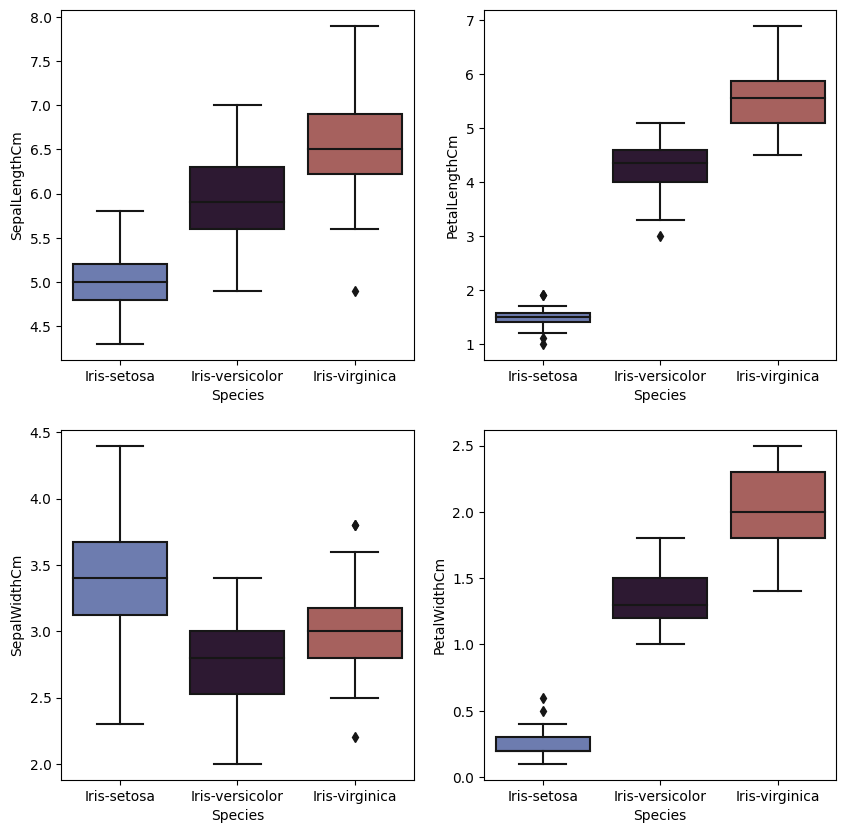

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.boxplot(y = 'SepalLengthCm', x = 'Species', data = data, palette = 'twilight')
plt.subplot(2,2,2)
sns.boxplot(y = 'PetalLengthCm', x = 'Species', data = data, palette = 'twilight')
plt.subplot(2,2,3)
sns.boxplot(y = 'SepalWidthCm', x = 'Species', data = data, palette = 'twilight')
plt.subplot(2,2,4)
sns.boxplot(y = 'PetalWidthCm', x = 'Species', data = data, palette = 'twilight')

In [17]:
data = data.sample(frac = 1)
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
102,7.1,3.0,5.9,2.1,Iris-virginica
96,5.7,2.9,4.2,1.3,Iris-versicolor
45,4.8,3.0,1.4,0.3,Iris-setosa
121,5.6,2.8,4.9,2.0,Iris-virginica
92,5.8,2.6,4.0,1.2,Iris-versicolor
...,...,...,...,...,...
20,5.4,3.4,1.7,0.2,Iris-setosa
48,5.3,3.7,1.5,0.2,Iris-setosa
124,6.7,3.3,5.7,2.1,Iris-virginica
9,4.9,3.1,1.5,0.1,Iris-setosa


In [18]:
label_encoder = preprocessing.LabelEncoder()
data['Species'] = label_encoder.fit_transform(data['Species'])
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
102,7.1,3.0,5.9,2.1,2
96,5.7,2.9,4.2,1.3,1
45,4.8,3.0,1.4,0.3,0
121,5.6,2.8,4.9,2.0,2
92,5.8,2.6,4.0,1.2,1
...,...,...,...,...,...
20,5.4,3.4,1.7,0.2,0
48,5.3,3.7,1.5,0.2,0
124,6.7,3.3,5.7,2.1,2
9,4.9,3.1,1.5,0.1,0


In [19]:
X = data.drop(['Species'], axis = 1)
Y = data.Species
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
102            7.1           3.0            5.9           2.1
96             5.7           2.9            4.2           1.3
45             4.8           3.0            1.4           0.3
121            5.6           2.8            4.9           2.0
92             5.8           2.6            4.0           1.2
..             ...           ...            ...           ...
20             5.4           3.4            1.7           0.2
48             5.3           3.7            1.5           0.2
124            6.7           3.3            5.7           2.1
9              4.9           3.1            1.5           0.1
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [20]:
print(Y)

102    2
96     1
45     0
121    2
92     1
      ..
20     0
48     0
124    2
9      0
149    2
Name: Species, Length: 150, dtype: int64


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.75, test_size = 0.25, random_state = 10)
X_train.shape

(112, 4)

In [22]:
X_test.shape

(38, 4)

In [23]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, Y_train)

DecisionTreeClassifier()

In [24]:
Y_pred = DTC.predict(X_test)
print(accuracy_score(Y_test, Y_pred)*100)

97.36842105263158


In [25]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      1.00      0.96        13
           2       1.00      0.90      0.95        10

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



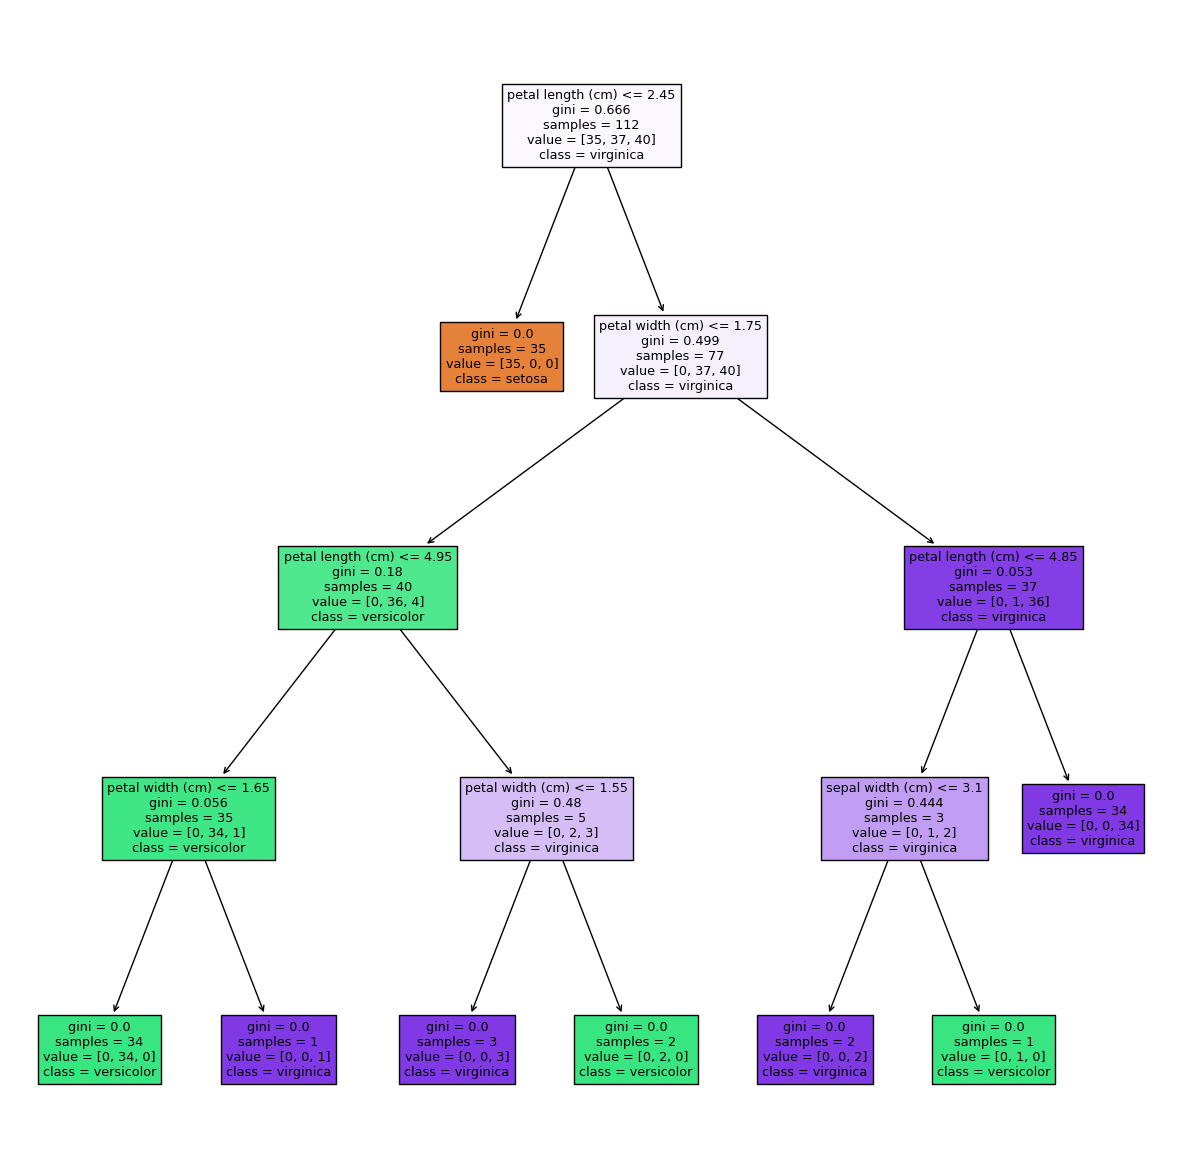

In [26]:
#Visualizing the decision tree
features =['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
species = ['setosa', 'versicolor', 'virginica']
fig = plt.figure(figsize = (15,15))
tree.plot_tree(DTC, feature_names = features, class_names = species, filled = True);